In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
orders = pd.read_csv("/home/dongsu/Desktop/instacart/small_orders.csv")

order_products = pd.read_csv("/home/dongsu/Desktop/instacart/small_order_products_prior.csv")

products = pd.read_csv("/home/dongsu/Desktop/instacart/products.csv")

aisles = pd.read_csv("/home/dongsu/Desktop/instacart/aisles.csv")

departments = pd.read_csv("/home/dongsu/Desktop/instacart/departments.csv")

In [3]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,8,23423,1,1
1,40,10070,1,1
2,40,42450,2,1
3,40,33198,3,1
4,40,34866,4,1


### 총 주문 횟수 그래프

In [5]:
# 유저 당 지금까지 총 몇 번 주문을 했는가?
total_order_user = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()

In [6]:
# 최대 주문 횟수가 많은 순으로 정렬
order_number_count = total_order_user.order_number.value_counts()

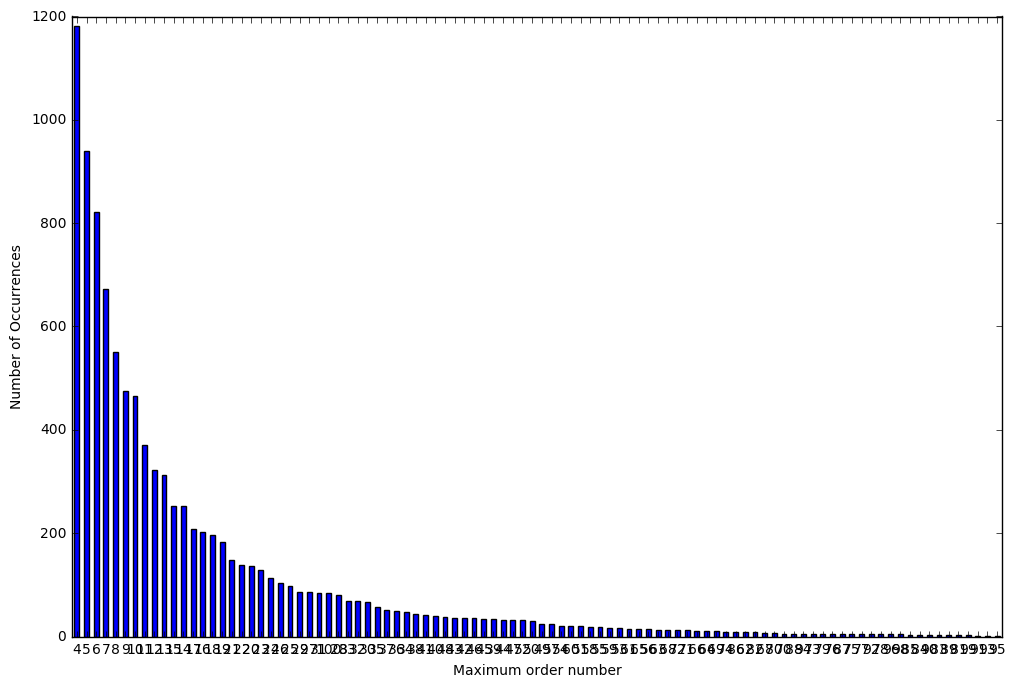

In [7]:
plt.figure(figsize=(12,8))
order_number_count.plot.bar()
plt.ylabel('Number of Occurrences')
plt.xlabel('Maximum order number')
plt.xticks(rotation='horizontal')
plt.show()

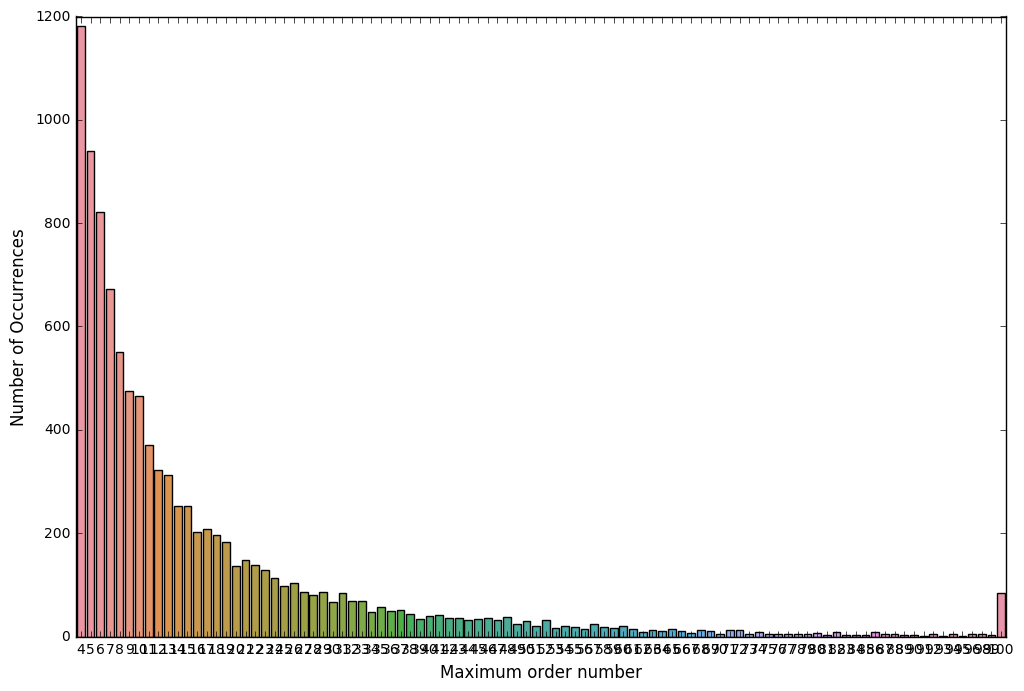

In [8]:
plt.figure(figsize=(12,8))
sns.barplot(order_number_count.index, order_number_count.values)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.show()

4번만 주문한 사람이 가장 많음

### 요일 별 주문 횟수 그래프

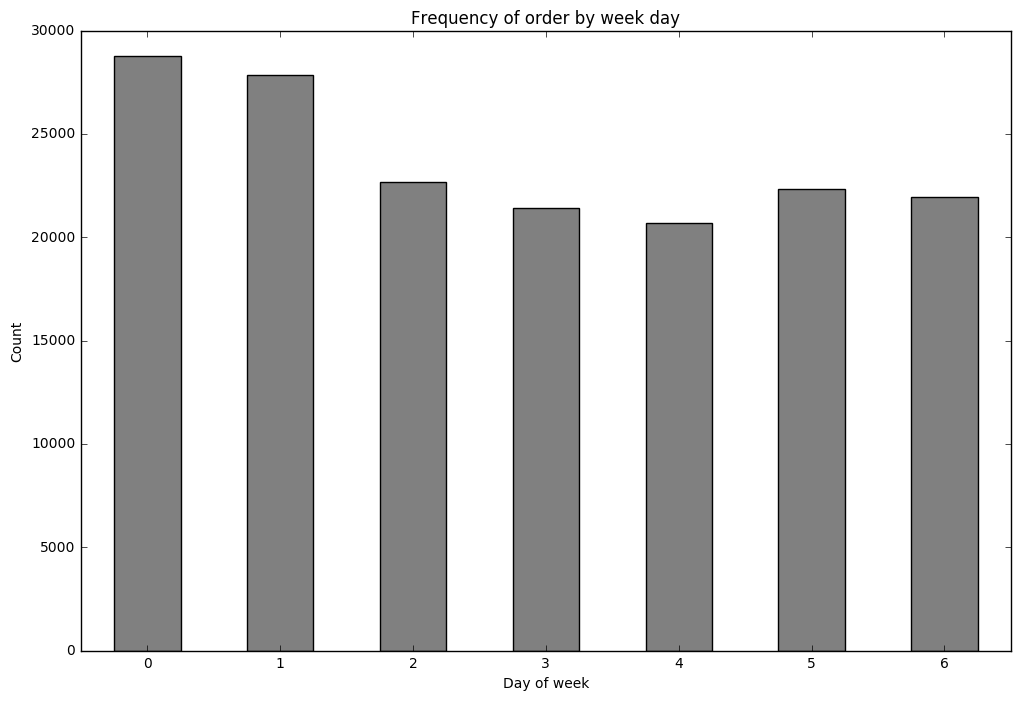

In [9]:
plt.figure(figsize=(12,8))
order_per_day = orders.groupby('order_dow').size()
order_per_day.plot.bar(color='gray')
plt.ylabel('Count')
plt.xlabel('Day of week')
plt.xticks(rotation='horizontal')
plt.title("Frequency of order by week day")
plt.show()

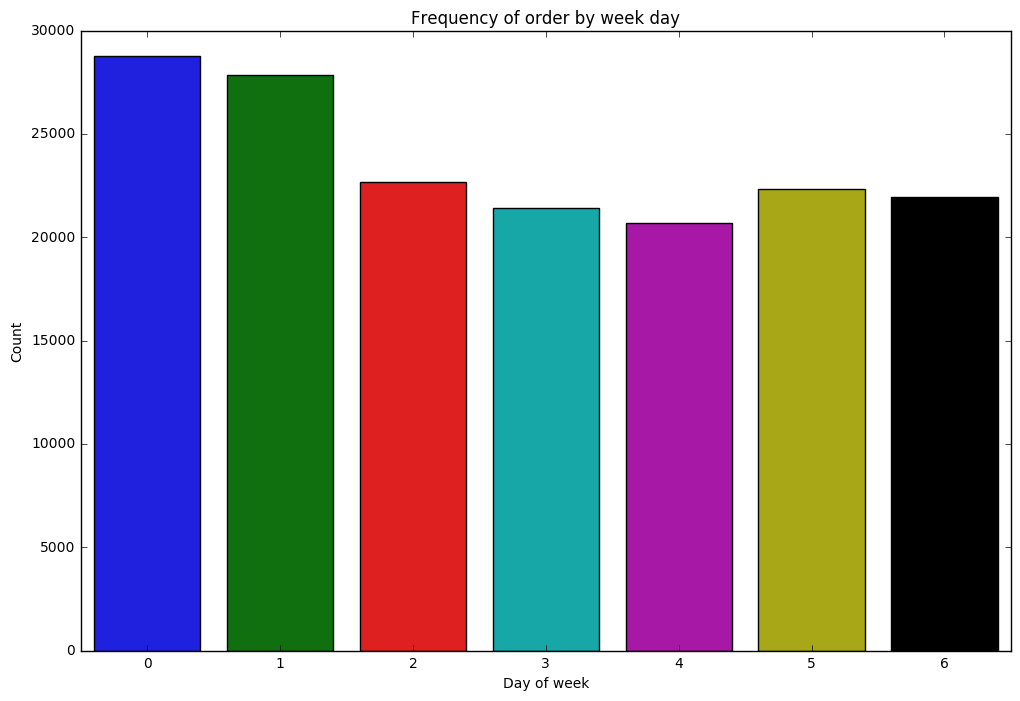

In [10]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders)
plt.ylabel('Count')
plt.xlabel('Day of week')
plt.title("Frequency of order by week day")
plt.show()

0과 1이 토요일, 일요일로 추정

### 시간 별 주문 횟수 그래프

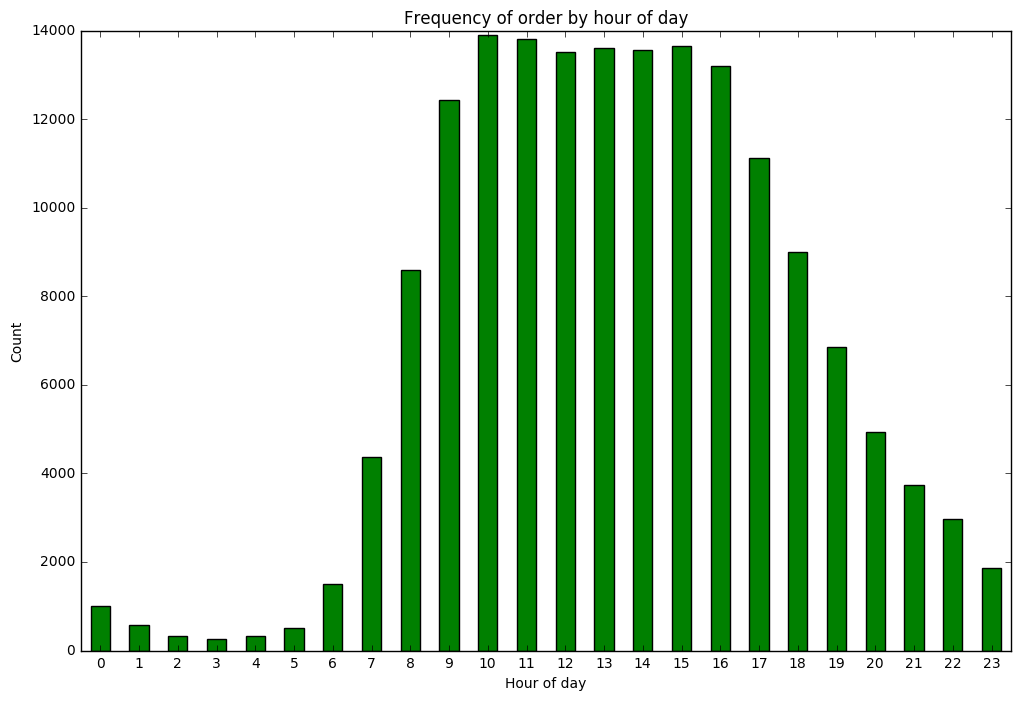

In [11]:
plt.figure(figsize=(12,8))
order_per_day = orders.groupby('order_hour_of_day').size()
order_per_day.plot.bar(color='green')
plt.ylabel('Count')
plt.xlabel('Hour of day')
plt.xticks(rotation='horizontal')
plt.title("Frequency of order by hour of day")
plt.show()

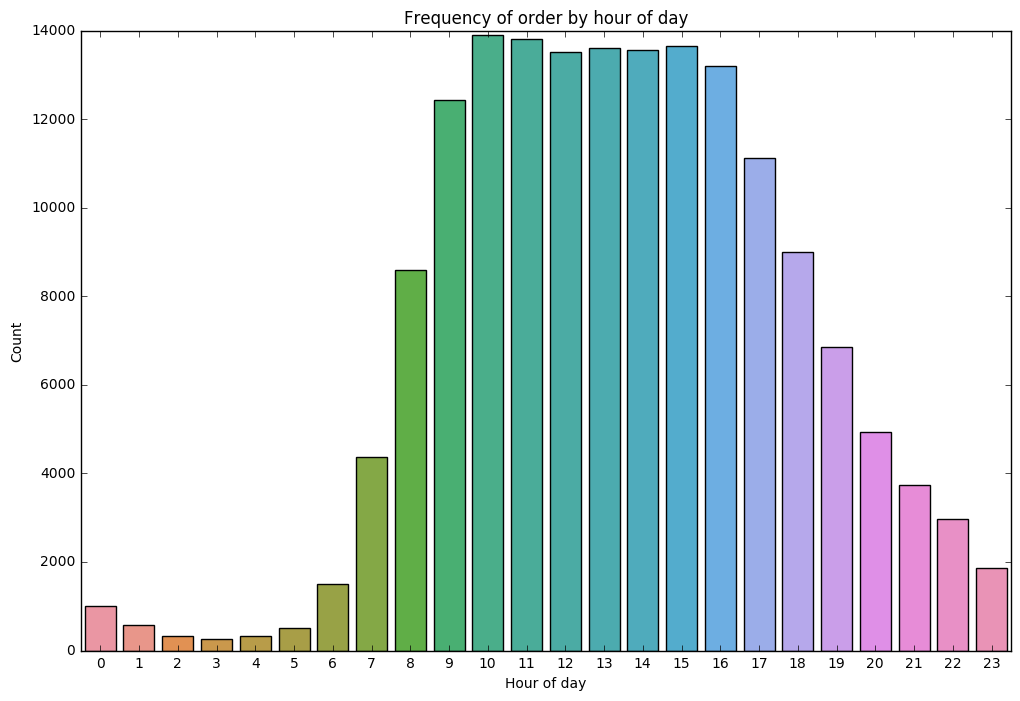

In [12]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders)
plt.ylabel('Count')
plt.xlabel('Hour of day')
plt.title("Frequency of order by hour of day")
plt.show()

### 이용 주기 그래프

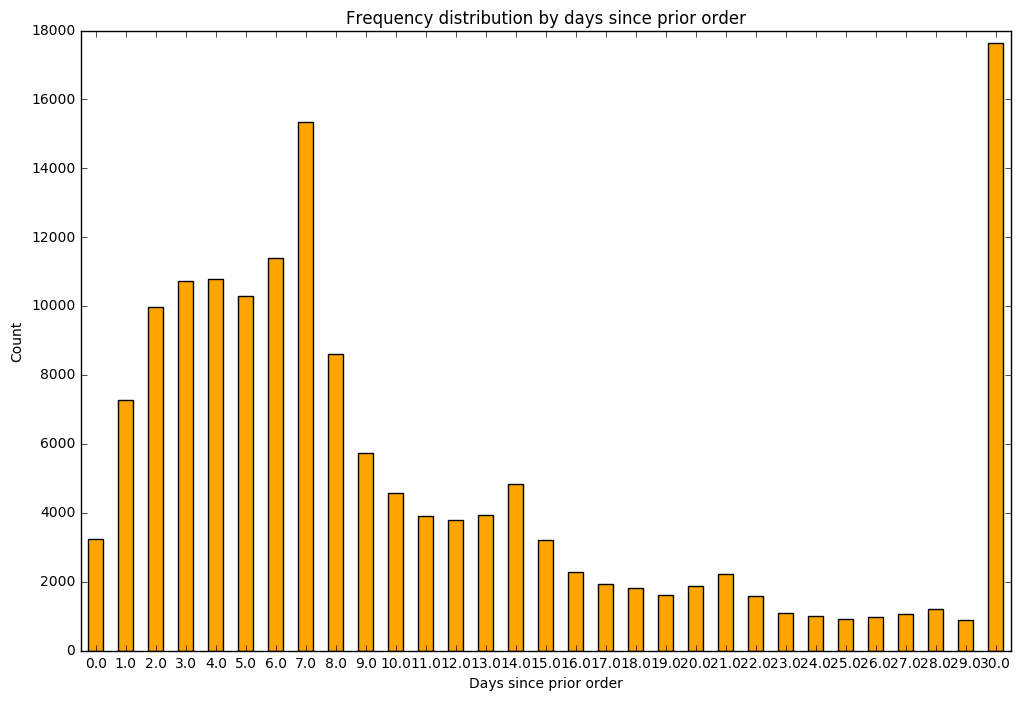

In [13]:
plt.figure(figsize=(12,8))
order_per_day = orders.groupby('days_since_prior_order').size()
order_per_day.plot.bar(color='orange')
plt.ylabel('Count')
plt.xlabel('Days since prior order')
plt.xticks(rotation='horizontal')
plt.title("Frequency distribution by days since prior order")
plt.show()

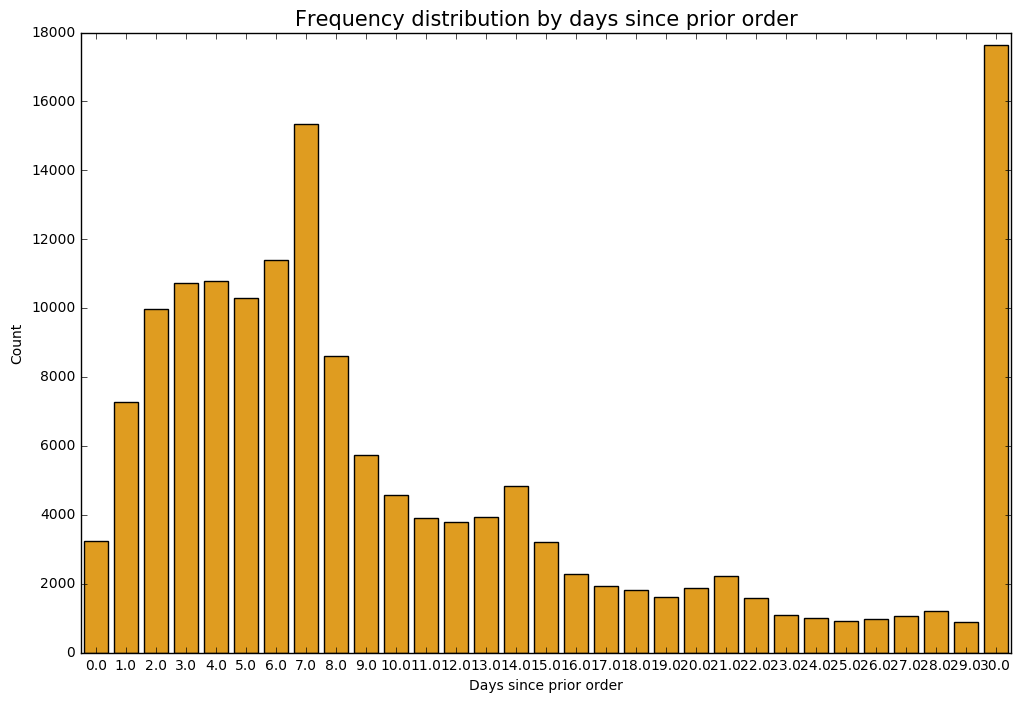

In [14]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color='orange')
plt.ylabel('Count')
plt.xlabel('Days since prior order')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

### 가장 많이 주문된 item 상위 20개

In [15]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,8,23423,1,1
1,40,10070,1,1
2,40,42450,2,1
3,40,33198,3,1
4,40,34866,4,1


In [16]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [17]:
# product_id 와 product_name mapping 위한 merge
order_products = pd.merge(order_products, products, on='product_id', how='left')
order_products

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,8,23423,1,1,Original Hawaiian Sweet Rolls,43,3
1,40,10070,1,1,Organic 1% Low Fat Milk,84,16
2,40,42450,2,1,Macaroni & Cheese,38,1
3,40,33198,3,1,Sparkling Natural Mineral Water,115,7
4,40,34866,4,1,Chocolate Milk 1% Milkfat,84,16
5,64,17889,1,1,Caramel Vanilla Cream Light Roast K-Cup Packs ...,26,7
6,64,9292,2,1,Half And Half Ultra Pasteurized,84,16
7,64,15424,3,1,Purified Water,115,7
8,64,18988,4,1,Ultra Soft & Strong® Toilet Paper Double Rolls,54,17
9,64,38959,5,1,"Smoothies, Strawberries Wild",113,1


In [18]:
popular_products = order_products['product_name'].value_counts().reset_index().head(20)
popular_products = popular_products.rename(columns = {'product_name':'frequency_count','index':'product_name'})
popular_products

,product_name,frequency_count
0,Banana,21855
1,Bag of Organic Bananas,17941
2,Organic Strawberries,12507
3,Organic Baby Spinach,11526
4,Organic Hass Avocado,10732
5,Organic Avocado,8060
6,Large Lemon,7334
7,Strawberries,6911
8,Organic Raspberries,6858
9,Limes,6714


### 많이 주문된 aisle 상위 20개 그래프

In [19]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,8,23423,1,1,Original Hawaiian Sweet Rolls,43,3
1,40,10070,1,1,Organic 1% Low Fat Milk,84,16
2,40,42450,2,1,Macaroni & Cheese,38,1
3,40,33198,3,1,Sparkling Natural Mineral Water,115,7
4,40,34866,4,1,Chocolate Milk 1% Milkfat,84,16


In [20]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [21]:
order_products = pd.merge(order_products, aisles, on='aisle_id', how='left')
order_products

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,8,23423,1,1,Original Hawaiian Sweet Rolls,43,3,buns rolls
1,40,10070,1,1,Organic 1% Low Fat Milk,84,16,milk
2,40,42450,2,1,Macaroni & Cheese,38,1,frozen meals
3,40,33198,3,1,Sparkling Natural Mineral Water,115,7,water seltzer sparkling water
4,40,34866,4,1,Chocolate Milk 1% Milkfat,84,16,milk
5,64,17889,1,1,Caramel Vanilla Cream Light Roast K-Cup Packs ...,26,7,coffee
6,64,9292,2,1,Half And Half Ultra Pasteurized,84,16,milk
7,64,15424,3,1,Purified Water,115,7,water seltzer sparkling water
8,64,18988,4,1,Ultra Soft & Strong® Toilet Paper Double Rolls,54,17,paper goods
9,64,38959,5,1,"Smoothies, Strawberries Wild",113,1,frozen juice


In [22]:
num_aisle = order_products['aisle'].value_counts().head(20)
num_aisle

fresh fruits                     172072
fresh vegetables                 163166
packaged vegetables fruits        83631
yogurt                            68028
packaged cheese                   46532
milk                              41981
water seltzer sparkling water     40913
chips pretzels                    34615
soy lactosefree                   30501
refrigerated                      28920
bread                             28594
frozen produce                    25616
ice cream ice                     23845
energy granola bars               22776
crackers                          22220
eggs                              21615
lunch meat                        19461
cereal                            18228
fresh herbs                       17830
frozen meals                      17789
Name: aisle, dtype: int64

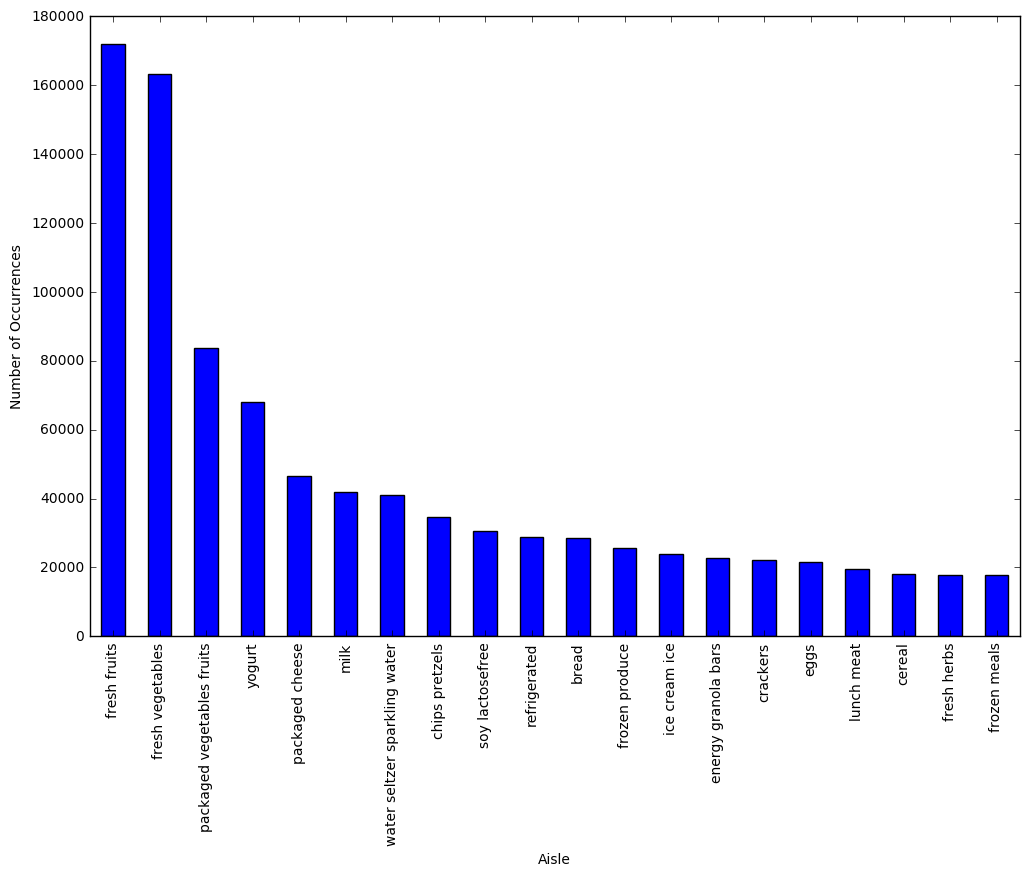

In [23]:
plt.figure(figsize=(12,8))
num_aisle.plot.bar(color='blue')
plt.ylabel('Number of Occurrences')
plt.xlabel('Aisle')
plt.show()

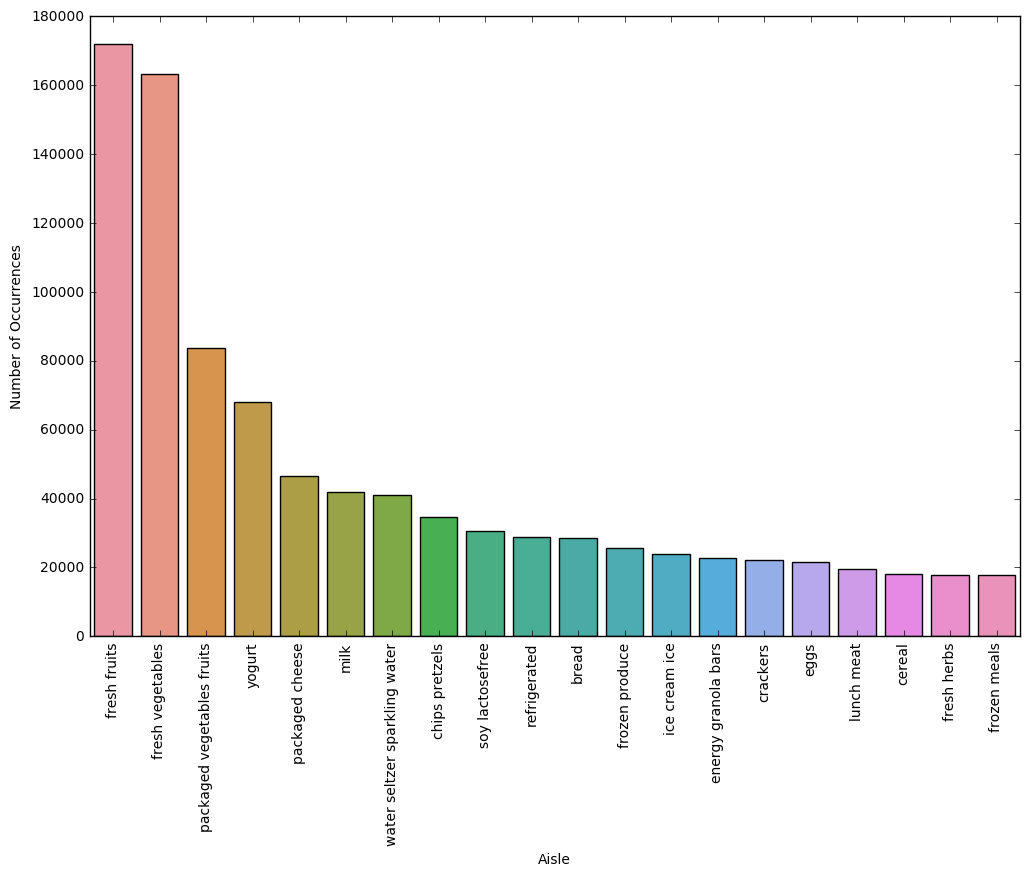

In [24]:
plt.figure(figsize=(12,8))
sns.barplot(num_aisle.index, num_aisle.values)
plt.ylabel('Number of Occurrences')
plt.xlabel('Aisle')
plt.xticks(rotation='vertical')
plt.show()

### 주문된 deparment 분포(비율) 그래프

In [25]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle
0,8,23423,1,1,Original Hawaiian Sweet Rolls,43,3,buns rolls
1,40,10070,1,1,Organic 1% Low Fat Milk,84,16,milk
2,40,42450,2,1,Macaroni & Cheese,38,1,frozen meals
3,40,33198,3,1,Sparkling Natural Mineral Water,115,7,water seltzer sparkling water
4,40,34866,4,1,Chocolate Milk 1% Milkfat,84,16,milk


In [26]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [27]:
order_products = pd.merge(order_products, departments, on='department_id', how='left')
order_products

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,8,23423,1,1,Original Hawaiian Sweet Rolls,43,3,buns rolls,bakery
1,40,10070,1,1,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
2,40,42450,2,1,Macaroni & Cheese,38,1,frozen meals,frozen
3,40,33198,3,1,Sparkling Natural Mineral Water,115,7,water seltzer sparkling water,beverages
4,40,34866,4,1,Chocolate Milk 1% Milkfat,84,16,milk,dairy eggs
5,64,17889,1,1,Caramel Vanilla Cream Light Roast K-Cup Packs ...,26,7,coffee,beverages
6,64,9292,2,1,Half And Half Ultra Pasteurized,84,16,milk,dairy eggs
7,64,15424,3,1,Purified Water,115,7,water seltzer sparkling water,beverages
8,64,18988,4,1,Ultra Soft & Strong® Toilet Paper Double Rolls,54,17,paper goods,household
9,64,38959,5,1,"Smoothies, Strawberries Wild",113,1,frozen juice,frozen


In [28]:
num_departments = order_products['department'].value_counts()
num_departments_ratio = (num_departments.values / num_departments.values.sum()) * 100

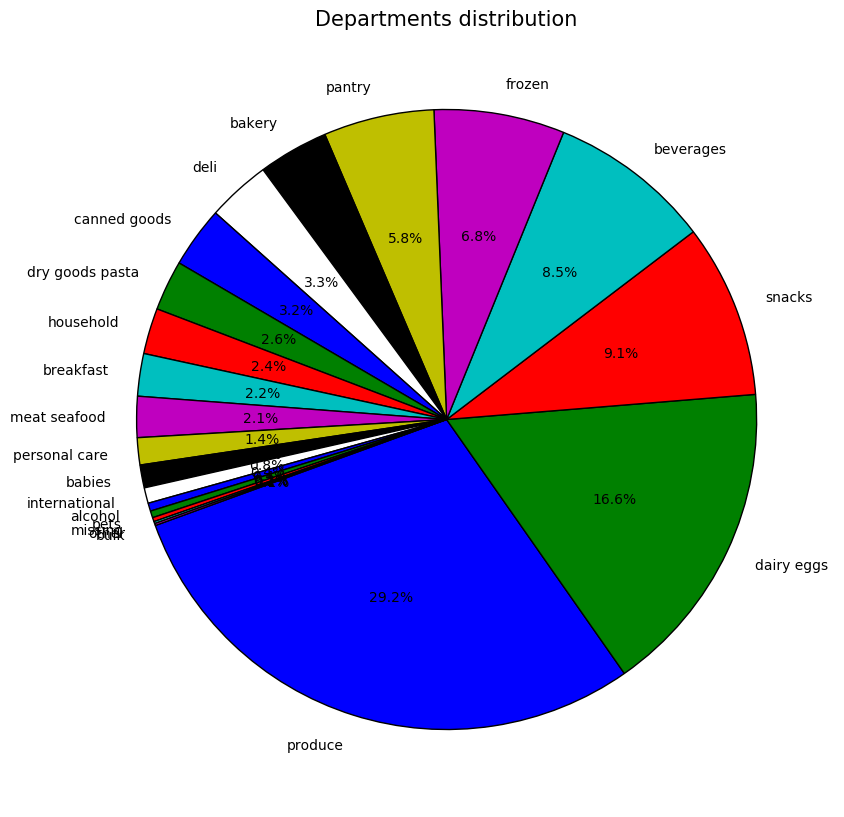

In [29]:
plt.figure(figsize=(10,10))
plt.pie(num_departments_ratio, labels=num_departments.index, autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

### department 와 reorder 관계(비율)

In [30]:
# department 별 reordered 의 평균
department_reorder = order_products.groupby(['department'])['reordered'].aggregate('mean')

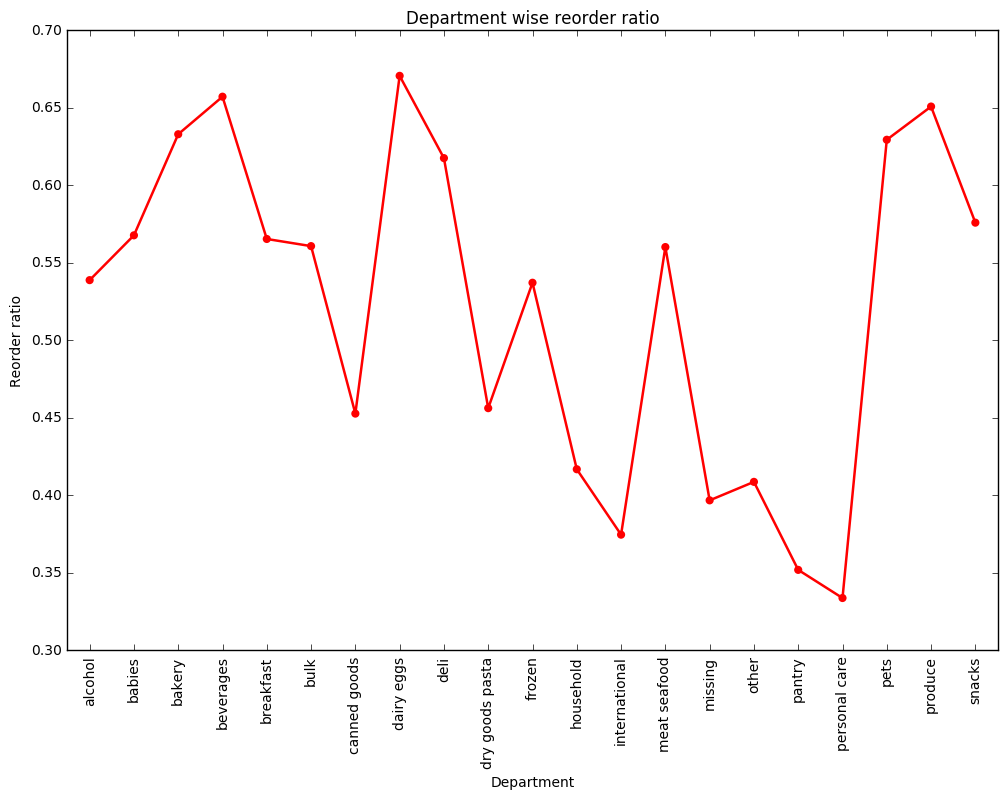

In [31]:
plt.figure(figsize=(12,8))
sns.pointplot(department_reorder.index, department_reorder.values, color='red')
plt.ylabel('Reorder ratio')
plt.xlabel('Department')
plt.title("Department wise reorder ratio")
plt.xticks(rotation='vertical')
plt.show()

dairy eggs의 경우 reorder의 비율이 높음 / personal care이 가장 낮음

### 상품 담은 순서(add to cart)와 reorder 관계(비율)

In [32]:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,8,23423,1,1,Original Hawaiian Sweet Rolls,43,3,buns rolls,bakery
1,40,10070,1,1,Organic 1% Low Fat Milk,84,16,milk,dairy eggs
2,40,42450,2,1,Macaroni & Cheese,38,1,frozen meals,frozen
3,40,33198,3,1,Sparkling Natural Mineral Water,115,7,water seltzer sparkling water,beverages
4,40,34866,4,1,Chocolate Milk 1% Milkfat,84,16,milk,dairy eggs


In [40]:
# 담은 순서 50번째까지만
# 이유 : 더 커질수록 빈도수가 작아지므로 reorder rate의 비율이 민감하게 반응
cart_reorder = order_products.groupby(['add_to_cart_order'])['reordered'].aggregate('mean')[:50]

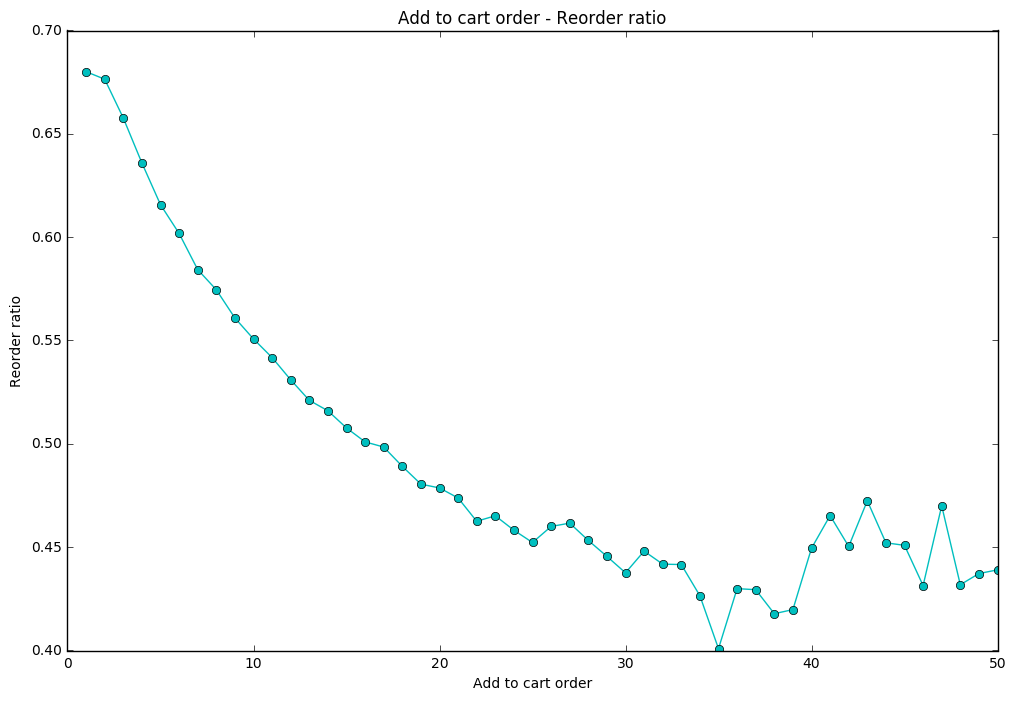

In [45]:
plt.figure(figsize=(12,8))
plt.plot(cart_reorder.index, cart_reorder.values, 'c-', marker='o')
plt.ylabel('Reorder ratio')
plt.xlabel('Add to cart order')
plt.title("Add to cart order - Reorder ratio")
plt.show()

처음 담긴 물건의 경우 reorder 비율 높다

자주 사는 물건의 경우 먼저 담고, 그 다음에 새로운 제품 산다

### Etc) Organic VS Non-Organic

In [80]:
is_organic = order_products['product_name'].str.lower().str.contains('organic')

In [86]:
total = is_organic.shape[0]
num_organic = np.count_nonzero(is_organic) # is_organic.sum()
num_non_organic = total - num_organic

In [89]:
new = pd.Series([num_non_organic / total, num_organic / total], index=['non organic', 'organic'])

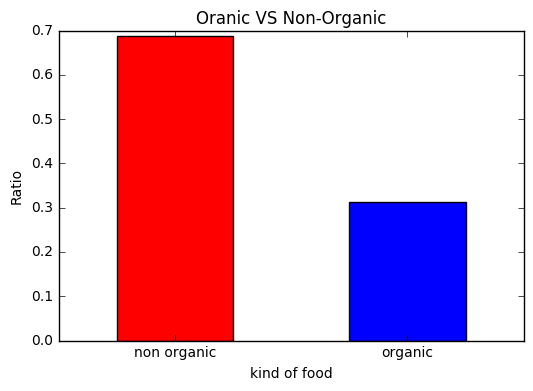

In [111]:
new.plot(kind='bar', color=['red','blue'])
plt.ylabel('Ratio')
plt.xlabel('kind of food')
plt.title("Oranic VS Non-Organic")
plt.xticks(rotation='horizontal')
plt.show()